In [2]:
import sympy
from sympy.abc import t, r, theta, phi
from einsteinpy.symbolic import MetricTensor, RicciTensor, RicciScalar, RiemannCurvatureTensor, EinsteinTensor
from einsteinpy.symbolic.christoffel import ChristoffelSymbols
import numpy as np
sympy.init_printing()

detaied outline:

one point per paragraphs

-intro
    notation
    pose the problem mathematically and in words
    
-literature review
    link between sem 1 work and disease prediction
    papers: fronteirs montanez SAE deeplearningbook
-methodolgy
    habiba data high variance on NNs, LR, SVMs
    simulate to benchmark
    different models
        AE
        p-thresholding
        
-results
    good bad
    describe plots and results. what are the outputs?
    
-discussion & conclusion
    talk about results
    analyzing results in context of first two chapters
    main takeaways
        AE k -> 0
        

    

In [3]:
A = sympy.Function("A")(r)
B = sympy.Function("B")(r)

g = MetricTensor(
    sympy.Array(
        np.diag([-A, B, r**2, r**2*sympy.sin(theta)**2]
               )
    ),
    syms=[t, r, theta, phi]
)
    
g.tensor()

⎡-A(r)   0    0       0     ⎤
⎢                           ⎥
⎢  0    B(r)  0       0     ⎥
⎢                           ⎥
⎢              2            ⎥
⎢  0     0    r       0     ⎥
⎢                           ⎥
⎢                  2    2   ⎥
⎣  0     0    0   r ⋅sin (θ)⎦

In [4]:
Gamma = ChristoffelSymbols.from_metric(g)
Gamma.tensor()

⎡                            ⎡d                                    ⎤          
⎢                            ⎢──(A(r))                             ⎥          
⎢                            ⎢dr                                   ⎥          
⎢⎡          d             ⎤  ⎢────────     0       0         0     ⎥          
⎢⎢          ──(A(r))      ⎥  ⎢ 2⋅B(r)                              ⎥          
⎢⎢          dr            ⎥  ⎢                                     ⎥  ⎡0  0  0
⎢⎢   0      ────────  0  0⎥  ⎢          d                          ⎥  ⎢       
⎢⎢           2⋅A(r)       ⎥  ⎢          ──(B(r))                   ⎥  ⎢      1
⎢⎢                        ⎥  ⎢          dr                         ⎥  ⎢0  0  ─
⎢⎢d                       ⎥  ⎢   0      ────────   0         0     ⎥  ⎢      r
⎢⎢──(A(r))                ⎥  ⎢           2⋅B(r)                    ⎥  ⎢       
⎢⎢dr                      ⎥  ⎢                                     ⎥  ⎢   1   
⎢⎢────────     0      0  0⎥  ⎢                    -r

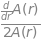

In [5]:
Gamma[0, 0, 1]

In [6]:
RieCurv = RiemannCurvatureTensor.from_christoffels(Gamma)
Ricci = RicciTensor.from_riemann(RieCurv)
Ricci.tensor()

⎡  2                                                                          
⎢ d                                        2                                  
⎢───(A(r))   d        d          ⎛d       ⎞    d                              
⎢  2         ──(A(r))⋅──(B(r))   ⎜──(A(r))⎟    ──(A(r))                       
⎢dr          dr       dr         ⎝dr      ⎠    dr                             
⎢───────── - ───────────────── - ─────────── + ────────                       
⎢  2⋅B(r)            2           4⋅A(r)⋅B(r)    r⋅B(r)                        
⎢                 4⋅B (r)                                                     
⎢                                                                             
⎢                                                            2                
⎢                                                           d                 
⎢                                                          ───(A(r))   d      
⎢                                                   

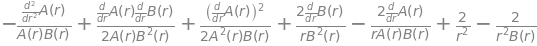

In [8]:
R = RicciScalar.from_riccitensor(Ricci)
R.tensor()

In [10]:
G = Ricci.tensor() - 0.5*sympy.tensor.tensorproduct(g.tensor(), R.tensor())

In [11]:
G

⎡    ⎛    2                                                                   
⎢    ⎜   d                                        2                           
⎢    ⎜  ───(A(r))   d        d          ⎛d       ⎞       d             d      
⎢    ⎜    2         ──(A(r))⋅──(B(r))   ⎜──(A(r))⎟     2⋅──(B(r))    2⋅──(A(r)
⎢    ⎜  dr          dr       dr         ⎝dr      ⎠       dr            dr     
⎢0.5⋅⎜- ───────── + ───────────────── + ──────────── + ────────── - ──────────
⎢    ⎜  A(r)⋅B(r)              2           2               2        r⋅A(r)⋅B(r
⎢    ⎝                 2⋅A(r)⋅B (r)     2⋅A (r)⋅B(r)    r⋅B (r)               
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                   